In [13]:
%matplotlib notebook

import glob
import numpy              as np
import matplotlib.pyplot  as plt

In [4]:
data30  = np.vstack((sorted(glob.glob("./output2_processed/data_f125*")),
                     sorted(glob.glob("./output2_processed/data_f140*")),
                     sorted(glob.glob("./output2_processed/data_f160*"))))

data150 = np.vstack((sorted(glob.glob("./output_processed/data_f125*")),
                     sorted(glob.glob("./output_processed/data_f140*")),
                     sorted(glob.glob("./output_processed/data_f160*"))))

In [28]:
redshift = np.array([
                    13.1786770623,
                    11.4570373786,
                    9.98559086506,
                    8.92332270367,
                    8.00809159233,
                    7.91022245231,
                    7.81306898635,
                    7.71663967056,
                    7.62096555463,
                    7.31995821916,
                    6.81118379676,
                    6.67022642988,
                    6.39350634415,
                    6.12418482211,
                    5.84934339486,
                    5.64512346537,
                    5.44560067999,
                    5.20237819903,
                    4.9662337173
                    ])

total_flux_30  =  np.zeros((3,19))
total_flux_150 =  np.zeros((3,19))

threshold = 2.

test_30 = np.loadtxt(data30[1,0])
images_30 = np.zeros((3,19,np.shape(test_30)[0],np.shape(test_30)[0]))
test_150 = np.loadtxt(data150[1,0])
images_150 = np.zeros((3,19,np.shape(test_150)[0],np.shape(test_150)[0]))

for z in range(0,19):
    
    for filt in [0,1,2]:
    
        data_30 =  np.dstack((np.loadtxt(data30[0,z]),np.loadtxt(data30[1,z]),np.loadtxt(data30[2,z])))
        data_150 = np.dstack((np.loadtxt(data150[0,z]),np.loadtxt(data150[1,z]),np.loadtxt(data150[2,z])))

        for i in range(0,np.shape(data_30)[0]):
            for j in range(0,np.shape(data_30)[0]):
                    if(data_30[i][j][filt]>threshold):
                        total_flux_30[filt,z] += data_30[i][j][filt]
                        images_30[filt,z,i,j] = 1

        for i in range(0,np.shape(data_150)[0]):
            for j in range(0,np.shape(data_150)[0]):
                    if(data_150[i][j][filt]>threshold):
                        total_flux_150[filt,z] += data_150[i][j][filt]
                        images_150[filt,z,i,j] = 1

    print(z)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [14]:
print(np.shape(data_30))
print(np.shape(data_150))

(71, 71, 3)
(356, 356, 3)


<IPython.core.display.Javascript object>


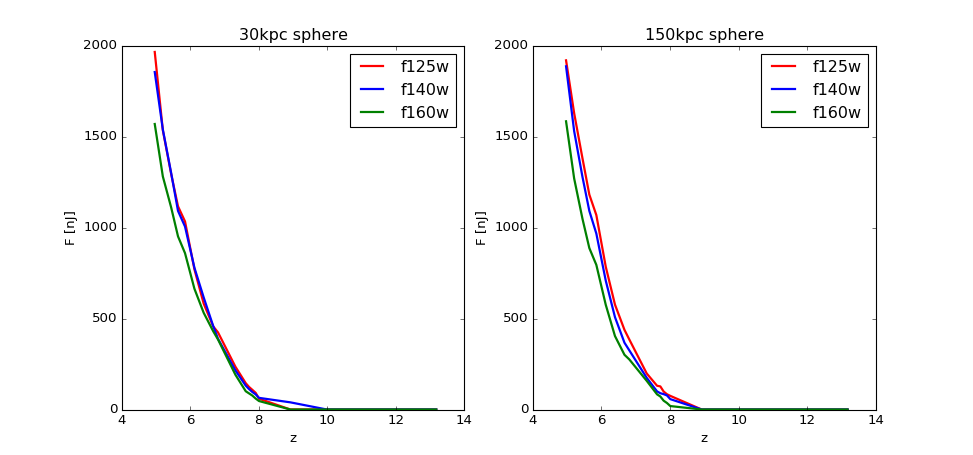

In [29]:
plt.figure(1)

plt.subplot(1,2,1)
plt.title('30kpc sphere')
plt.plot(redshift,total_flux_30[0,:],lw=2,c='r',label='f125w')
plt.plot(redshift,total_flux_30[1,:],lw=2,c='b',label='f140w')
plt.plot(redshift,total_flux_30[2,:],lw=2,c='g',label='f160w')
plt.legend(loc='upper right')
plt.xlabel('z')
plt.ylabel('F [nJ]')

plt.subplot(1,2,2)
plt.title('150kpc sphere')
plt.plot(redshift,total_flux_150[0,:],lw=2,c='r',label='f125w')
plt.plot(redshift,total_flux_150[1,:],lw=2,c='b',label='f140w')
plt.plot(redshift,total_flux_150[2,:],lw=2,c='g',label='f160w')
plt.legend(loc='upper right')
plt.xlabel('z')
plt.ylabel('F [nJ]')



<IPython.core.display.Javascript object>


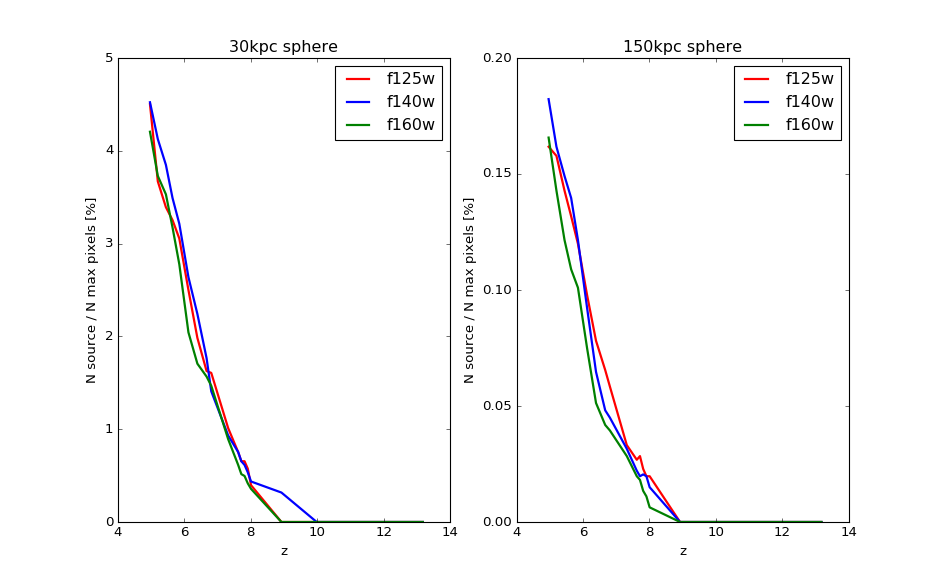

In [30]:
Npixels_source_30  = np.zeros((3,19))
Npixels_source_150 = np.zeros((3,19))

for z in range(0,19):
    for filt in [0,1,2]:
        Npixels_source_30[filt,z] = int(np.sum(images_30[filt,z,:,:]))/np.shape(test_30)[0]/np.shape(test_30)[0]*100
        Npixels_source_150[filt,z] = int(np.sum(images_150[filt,z,:,:]))/np.shape(test_150)[0]/np.shape(test_150)[0]*100
        
plt.figure(2)

plt.subplot(1,2,1)
plt.title('30kpc sphere')
plt.plot(redshift,Npixels_source_30[0,:],lw=2,c='r',label='f125w')
plt.plot(redshift,Npixels_source_30[1,:],lw=2,c='b',label='f140w')
plt.plot(redshift,Npixels_source_30[2,:],lw=2,c='g',label='f160w')
plt.legend(loc='upper right')
plt.xlabel('z')
plt.ylabel('N source / N max pixels [%]')

plt.subplot(1,2,2)
plt.title('150kpc sphere')
plt.plot(redshift,Npixels_source_150[0,:],lw=2,c='r',label='f125w')
plt.plot(redshift,Npixels_source_150[1,:],lw=2,c='b',label='f140w')
plt.plot(redshift,Npixels_source_150[2,:],lw=2,c='g',label='f160w')
plt.legend(loc='upper right')
plt.xlabel('z')
plt.ylabel('N source / N max pixels [%]')


<IPython.core.display.Javascript object>


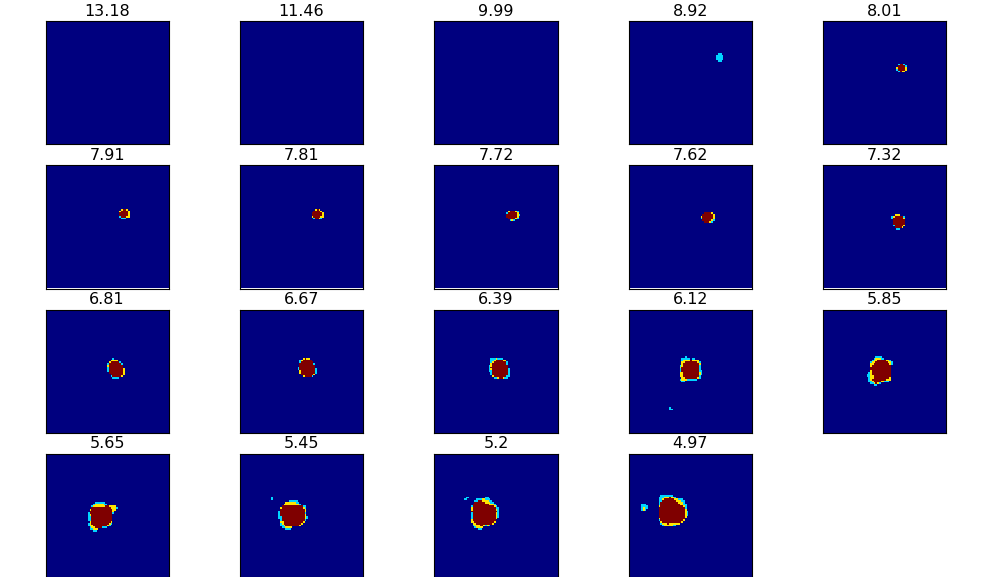

In [37]:
for z in range(0,19):

    plt.figure(3)
    plt.subplot(4,5,z+1)
    plt.imshow(images_30[0,z,:,:]+images_30[1,z,:,:]+images_30[2,z,:,:], interpolation='nearest',vmin=0, vmax=3)
    plt.yticks([])
    plt.xticks([])
    plt.title( str(round(redshift[z],2)))
    plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

<IPython.core.display.Javascript object>


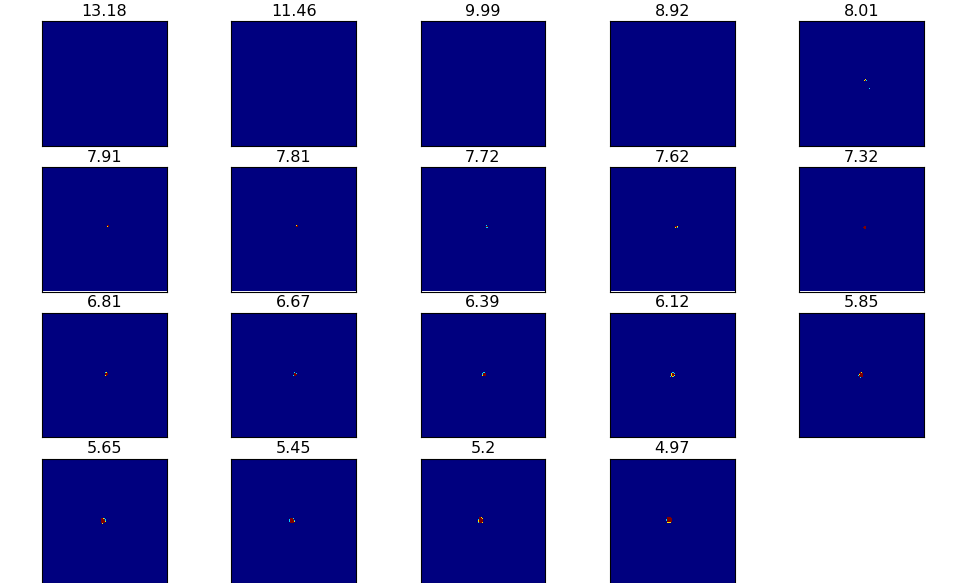

In [36]:
for z in range(0,19):

    plt.figure(4)
    plt.subplot(4,5,z+1)
    plt.imshow(images_150[0,z,:,:]+images_150[1,z,:,:]+images_150[2,z,:,:], interpolation='nearest',vmin=0, vmax=3)
    plt.yticks([])
    plt.xticks([])
    plt.title( str(round(redshift[z],2)))
    plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
